In [1]:
from PIL import Image
import cv2
import numpy as np

In [2]:
def find_template_location(image, template):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

    best = None

    for scale in np.linspace(0.6, 1.4, 20):
        resized = cv2.resize(template, None, fx=scale, fy=scale)
        th, tw = resized.shape

        if th > image.shape[0] or tw > image.shape[1]:
            continue

        res = cv2.matchTemplate(image, resized, cv2.TM_CCOEFF_NORMED)
        _, val, _, loc = cv2.minMaxLoc(res)

        if best is None or val > best[0]:
            best = (val, loc, (tw, th))

    val, (x, y), (w, h) = best
    bbox = (x, y, x + w, y + h)

    return val, bbox

In [3]:
import imagehash

def are_images_visually_similar(img1, img2, cutoff=9):
    """
    Checks if two images are visually similar using average hashing.
    A lower cutoff means higher similarity (0 is identical).
    """
    try:
        hash1 = imagehash.average_hash(img1)
        hash2 = imagehash.average_hash(img2)

        # Calculate the difference (Hamming distance) between hashes
        hash_diff = hash1 - hash2

        if hash_diff < cutoff:
            return True
        else:
            return False
    except FileNotFoundError:
        return False

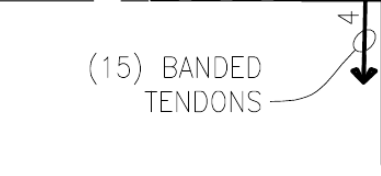

In [4]:
img = cv2.imread("/home/sadid/PycharmProjects/sgs-drawing-analysis/data/examples/Screenshot from 2025-12-28 19-17-35.png", cv2.IMREAD_COLOR)
Image.fromarray(img)

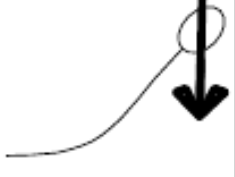

In [5]:
template = cv2.imread("/home/sadid/PycharmProjects/sgs-drawing-analysis/img_templates/bottom-left.png", cv2.IMREAD_COLOR)
Image.fromarray(template)

Area of contour 5: 2003.5


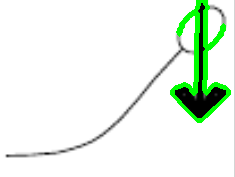

In [6]:
def find_contours(image_cropped):
    gray = cv2.cvtColor(image_cropped, cv2.COLOR_BGR2GRAY)
    inverted_image = cv2.bitwise_not(gray)
    _, thresh = cv2.threshold(inverted_image, 100, 255, 0)
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    return contours


def match_contours(source_cnt, image_crop):
    target_cnt_s = find_contours(image_crop)
    image_copy = image_crop.copy()
    matched = False
    for c in target_cnt_s:
        r = cv2.matchShapes(source_cnt, c, cv2.CONTOURS_MATCH_I1, 0.0)
        if r < 50 and cv2.contourArea(c) > 500:
            print(r)
            print(cv2.contourArea(c), cv2.contourArea(source_cnt))
            cv2.drawContours(image_copy, [c], -1, (0,255,0), 3)
            matched = True

    print(matched)
    return image_copy

cnt_s = find_contours(template)
img_copy = template.copy()

for i, cnt in enumerate(cnt_s):
    area = cv2.contourArea(cnt)

    if area > 600:
        print(f"Area of contour {i}: {area}")
        cv2.drawContours(img_copy, [cnt], -1, (0,255,0), 3)
        # ret = cv2.matchShapes(cnt, cnt, cv2.CONTOURS_MATCH_I1, 0.0)
        # print(ret)

Image.fromarray(img_copy)

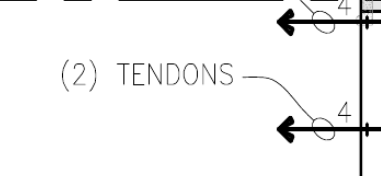

In [7]:
img = cv2.imread("/home/sadid/PycharmProjects/sgs-drawing-analysis/data/examples/Screenshot from 2025-12-28 19-17-58.png", cv2.IMREAD_COLOR)

Image.fromarray(img)

False


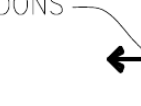

In [8]:
def find_template_and_match(source_image, template_image):
    val, bbox = find_template_location(source_image, template_image)
    x1, y1, x2, y2 = bbox
    img_crop = img[y1:y2, x1:x2]

    return match_contours(cnt_s[2], img_crop)


img_copy = find_template_and_match(img, template)
Image.fromarray(img_copy)

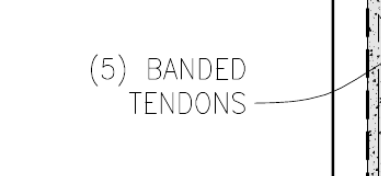

In [9]:
img = cv2.imread("/home/sadid/PycharmProjects/sgs-drawing-analysis/data/examples/Screenshot from 2025-12-28 19-17-47.png", cv2.IMREAD_COLOR)
Image.fromarray(img)

False


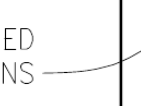

In [10]:
img_copy = find_template_and_match(img, template)
Image.fromarray(img_copy)

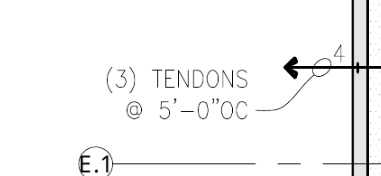

In [11]:
img = cv2.imread("/home/sadid/PycharmProjects/sgs-drawing-analysis/data/examples/Screenshot from 2025-12-28 20-12-12.png", cv2.IMREAD_COLOR)
Image.fromarray(img)

False


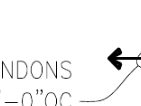

In [12]:
img_copy = find_template_and_match(img, template)
Image.fromarray(img_copy)

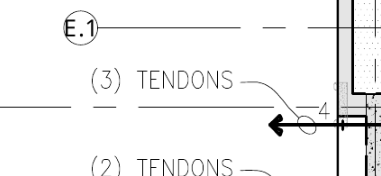

In [13]:
img = cv2.imread("/home/sadid/PycharmProjects/sgs-drawing-analysis/data/examples/Screenshot from 2025-12-28 20-12-20.png", cv2.IMREAD_COLOR)
Image.fromarray(img)

30.0785066087352
587.0 9.0
True


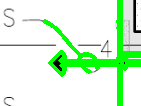

In [14]:
img_copy = find_template_and_match(img, template)
Image.fromarray(img_copy)

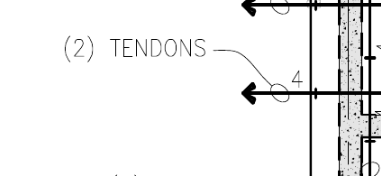

In [15]:
img = cv2.imread("/home/sadid/PycharmProjects/sgs-drawing-analysis/data/examples/Screenshot from 2025-12-28 20-12-24.png", cv2.IMREAD_COLOR)
Image.fromarray(img)

False


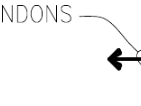

In [16]:
img_copy = find_template_and_match(img, template)
Image.fromarray(img_copy)

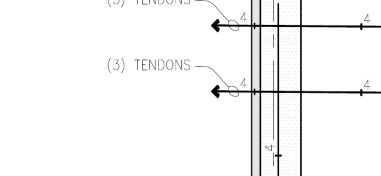

In [17]:
img = cv2.imread("/home/sadid/PycharmProjects/sgs-drawing-analysis/data/examples/Screenshot from 2025-12-28 20-12-40.png", cv2.IMREAD_COLOR)
Image.fromarray(img)

False


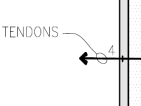

In [18]:
img_copy = find_template_and_match(img, template)
Image.fromarray(img_copy)

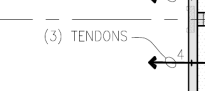

In [19]:
img = cv2.imread("/home/sadid/PycharmProjects/sgs-drawing-analysis/data/examples/Screenshot from 2025-12-28 20-12-56.png", cv2.IMREAD_COLOR)
Image.fromarray(img)

In [20]:
img_copy = find_template_and_match(img, template)
Image.fromarray(img_copy)

TypeError: cannot unpack non-iterable NoneType object

In [ ]:
img = cv2.imread("/home/sadid/PycharmProjects/sgs-drawing-analysis/data/examples/Screenshot from 2025-12-28 20-13-00.png", cv2.IMREAD_COLOR)
Image.fromarray(img)

In [ ]:
img_copy = find_template_and_match(img, template)
Image.fromarray(img_copy)

In [ ]:
img = cv2.imread("/home/sadid/PycharmProjects/sgs-drawing-analysis/data/examples/Screenshot from 2025-12-28 20-13-24.png", cv2.IMREAD_COLOR)
Image.fromarray(img)

In [ ]:
img_copy = find_template_and_match(img, template)
Image.fromarray(img_copy)

In [ ]:
img = cv2.imread("/home/sadid/PycharmProjects/sgs-drawing-analysis/data/examples/Screenshot from 2025-12-28 20-13-29.png", cv2.IMREAD_COLOR)
Image.fromarray(img)

In [ ]:
img_copy = find_template_and_match(img, template)
Image.fromarray(img_copy)